<a href="https://colab.research.google.com/github/SasidharaSrivatchasa/Air-Temperature-Forecasting/blob/main/PRAICP_1003_AirTempTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [4]:
# Load Dataset
file_path = '/content/surface-air-temperature-monthly-mean.csv'
df = pd.read_csv(file_path)


In [5]:
#converting month column to datetime format
df['month'] = pd.to_datetime(df['month'])

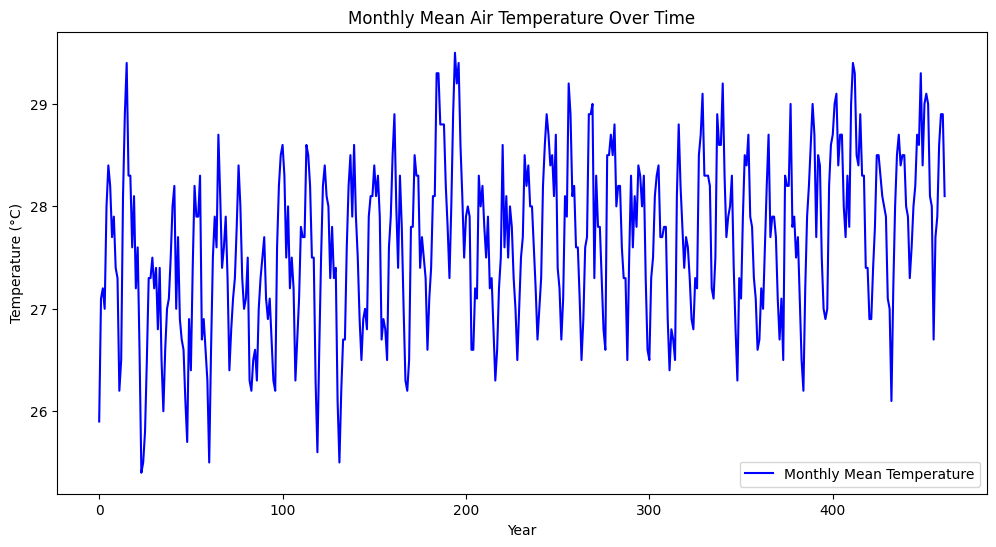

In [6]:
# Plot the time series data here we select all the data for ploting the graph
plt.figure(figsize=(12,6))
plt.plot(df['mean_temp'], label='Monthly Mean Temperature', color='blue') # we can use any color needed(red,blue,green,orange,black...)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')# for getting degree symbol " ° " we can use this alt + 0176
plt.title('Monthly Mean Air Temperature Over Time')
plt.legend()
plt.show()

In [7]:
# splitting the train and test data by 80-20
train_size = int(len(df)*0.8)
train = df[:train_size]
test = df[train_size:]

In [8]:
# Fit ARIMA Model(ARIMA Model is a Autoregressive Integrated Moving average model)
model = ARIMA(train['mean_temp'], order=(5,1,0))  # (p,d,q) parameters can be tuned
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              mean_temp   No. Observations:                  369
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -321.565
Date:                Sun, 09 Mar 2025   AIC                            655.131
Time:                        06:09:30   BIC                            678.579
Sample:                             0   HQIC                           664.447
                                - 369                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0437      0.056     -0.786      0.432      -0.153       0.065
ar.L2         -0.0019      0.056     -0.033      0.974      -0.112       0.108
ar.L3         -0.1118      0.052     -2.138      0.0

In [9]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))

In [12]:
# Evaluate Model
mae = mean_absolute_error(test['mean_temp'], forecast)
rmse = math.sqrt(mean_squared_error(test['mean_temp'], forecast))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.6238647036349766
Root Mean Squared Error (RMSE): 0.757091178772054


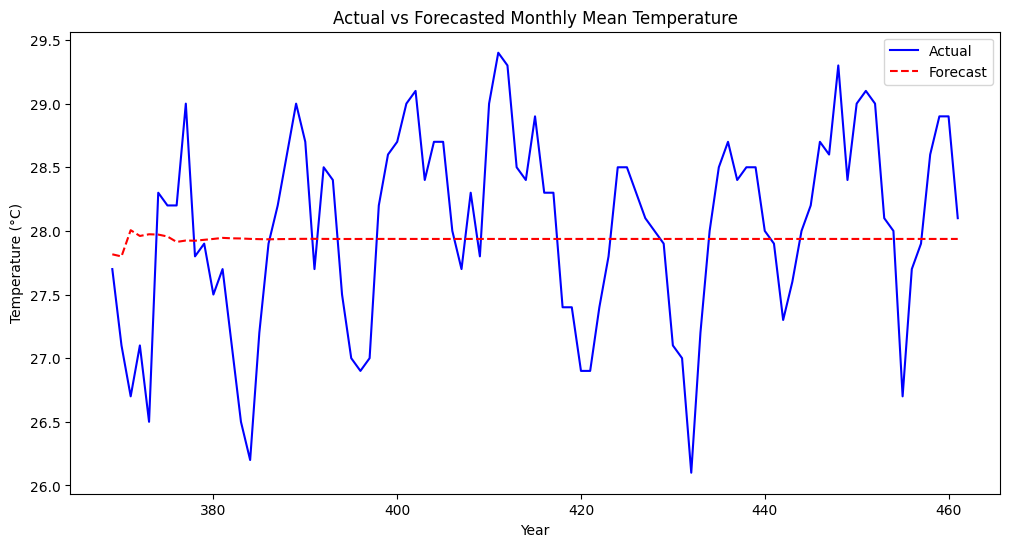

In [14]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(test.index, test['mean_temp'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Forecasted Monthly Mean Temperature')
plt.legend()
plt.show()


In [15]:
# Predict Next 12 Months
future_forecast = model_fit.forecast(steps=12)
print("Predicted Monthly Means for Next 12 Months:")
print(future_forecast)

Predicted Monthly Means for Next 12 Months:
369    27.816071
370    27.799361
371    28.005645
372    27.960309
373    27.973536
374    27.971116
375    27.956093
376    27.913380
377    27.924374
378    27.922910
379    27.930029
380    27.936894
Name: predicted_mean, dtype: float64
